In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using StatsBase
using Alert

In [ ]:
function covariance_S(X::Array{Float64,1},Y::Array{Float64,1})
    n=length(X)
    cov=0
    Xm=mean(X)
    Ym=mean(Y)
    for i=1:n
        cov=(X[i]-Xm)*(Y[i]-Ym) + cov
    end
    return cov/n
end

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,η::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)-1                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(sqrt(2*η*Δt)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

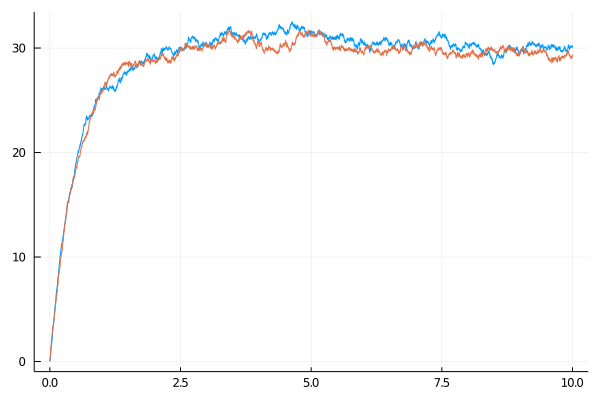

In [101]:
k0=0.01
t0=0.01

γK=2.0
γT=2.0

ηK=1.0
ηT=1.0

N=10.0

Δt=0.001

t=0:Δt:N

ctek=30.0
ctet=30.0

K=OUH(k0,γK,t,Δt,ηK,ctek)
T=OUH(t0,γT,t,Δt,ηT,ctet)
plot(t,K,legend=false)
plot!(t,T,legend=false)

In [131]:
A=[]
for i=1:500
    push!(A,OUH(k0,γK,t,Δt,ηK,ctek))
end

In [132]:
OH=Float64[]
for i=1000:length(t)
    a=covariance_S(transpose(hcat(A...))[:,1000],transpose(hcat(A...))[:,i])
    push!(OH,a)
end

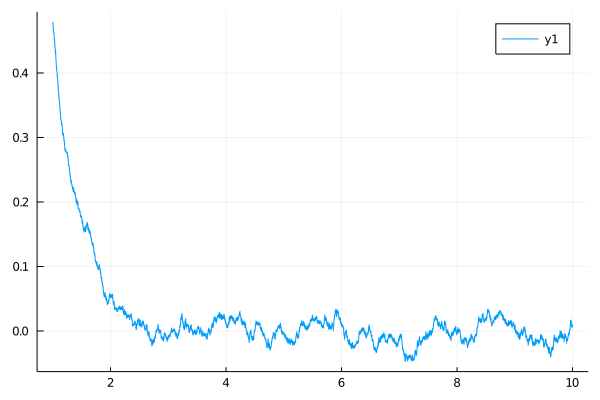

In [133]:
plot(t[1000:length(t)],OH)

In [63]:
transpose(hcat(A...))[:,1]

500-element Array{Float64,1}:
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 ⋮
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01

In [75]:
mean(randn(10000000))

0.00033364759951974316

In [84]:
covariance_S(randn(10000000),randn(10000000))

0.0001811831254335065

In [85]:
cov(randn(10000000),randn(10000000))

-0.0002516699898739474